In [ ]:
# ==========================================
# 各種ライブラリと CSV データの読み込み
# ==========================================
# 自動リロードを有効にする設定
%load_ext autoreload
%autoreload 2

# 必要なライブラリのインストール
%pip install pycountry
%pip install matplotlib
%pip install nltk

# ライブラリのインポート
import numpy as np  # 線形代数
import pandas as pd  # データ処理、CSVファイルのI/O（例：pd.read_csv）
import matplotlib.pyplot as plt
from collections import Counter

# 独自モジュールのインポート
from modules.preprocessor import Preprocessor

# CSVデータを pandas データフレームオブジェクトとして読み込み
df = pd.read_csv("../input/nlp-getting-started/train.csv")
df = df.fillna("")  # 空のカラムを空文字に置換

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Keyword Counts:
                   keyword  count
0                              61
1               fatalities     45
2                   deluge     42
3               armageddon     42
4                   damage     41
..                     ...    ...
217          forest%20fire     19
218              epicentre     12
219                 threat     11
220             inundation     10
221  radiation%20emergency      9

[222 rows x 2 columns]


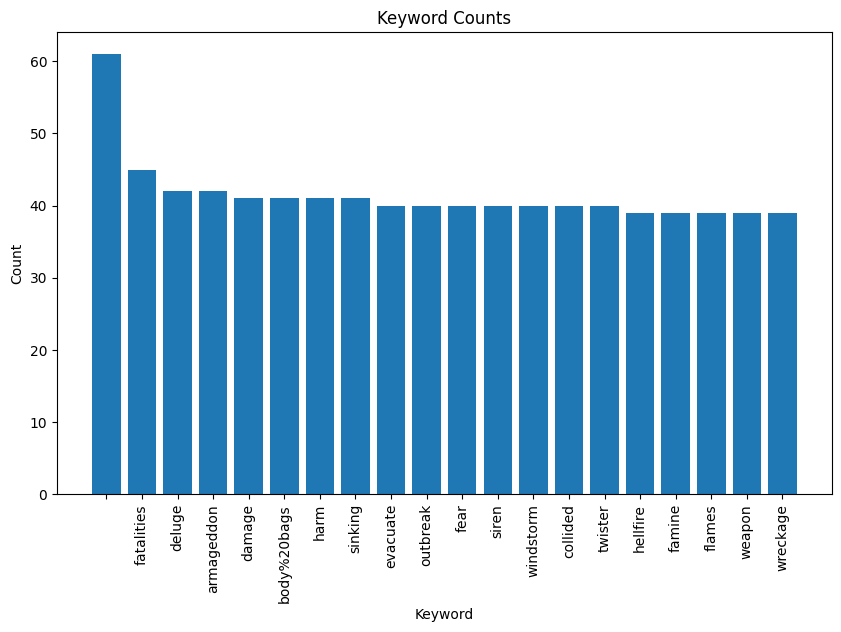

In [20]:
# ==========================================
# EDA (探索的データ解析) 前処理前
# ==========================================
# keyword カラムの登場回数をカウント、表にまとめる
keyword_counts = df["keyword"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "count"]
print("Keyword Counts:")
print(keyword_counts)

# 出現回数上位20件を取得
top_n = 20

# 棒グラフで可視化
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts["keyword"][:top_n], keyword_counts["count"][:top_n])
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.title("Keyword Counts")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# ==========================================
# 前処理 > データクリーニング（Data Cleaning）
# ==========================================
# 元データをコピーして、特徴量とターゲットに分割
X_raw = df[["text", "keyword", "location"]].copy()
y = df["target"].copy()  # ターゲット変数

# "text" カラムと "location" カラムのデータクリーニング
X_processed = X_raw.copy()
X_processed["text"] = Preprocessor.normalize_text(X_raw["text"])

# 上位20件のキーワードをステミング処理して表示
X_processed["keyword"] = Preprocessor.normalize_keyword(X_raw["keyword"])
print(X_processed["keyword"][190:210])
# X_processed["location"] = Preprocessor.normalize_location(X_raw["location"])
































ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
ablaz
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
accid
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
aftershock
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
airplaneaccid
a

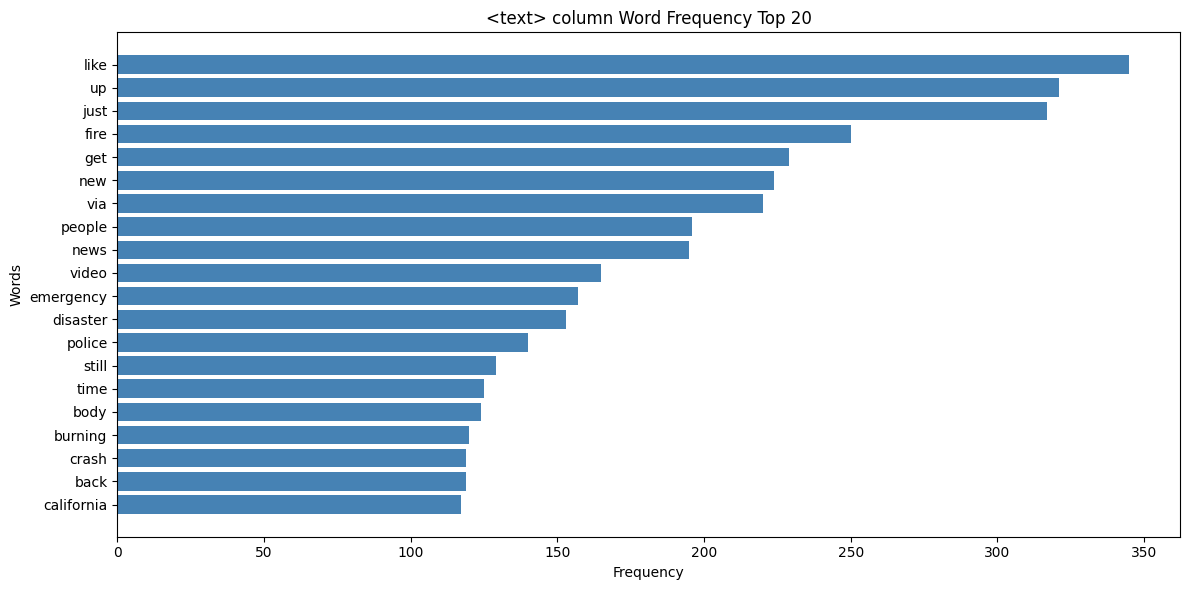

Keyword Counts After Processing:
            keyword  count
0             fatal    120
1            derail    112
2             evacu    112
3             flood    109
4           bodybag    107
..              ...    ...
161         bushfir     25
162          warzon     24
163        epicentr     12
164          threat     11
165  radiationemerg      9

[166 rows x 2 columns]


In [10]:
# ==========================================
# EDA (探索的データ解析) データクリーニング後
# ==========================================
# すべてのテキストを結合し、空白で分割して単語リストを作成
all_words = " ".join(X_processed["text"]).split()

# 単語の出現回数をカウント
word_counts = Counter(all_words)

# 出現回数上位20件を取得
top_n = 20
most_common_words = word_counts.most_common(top_n)

# 単語と出現回数を分離
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# 棒グラフの描画
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(words[::-1], counts[::-1], color="steelblue")  # 上位が上に来るよう反転
ax.set_xlabel("Frequency")
ax.set_ylabel("Words")
ax.set_title(f"<text> column Word Frequency Top {top_n}")

# グラフのレイアウトを調整して表示
plt.tight_layout()
plt.show()


# クリーニング後の keyword カラムの登場回数をカウント、表にまとめる
keyword_counts_processed = X_processed["keyword"].value_counts().reset_index()
keyword_counts_processed.columns = ["keyword", "count"]
print("Keyword Counts After Processing:")
print(keyword_counts_processed)